In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("IMDB_Dataset.csv")

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Navaneeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
corpus = []
for i in range(0, 50000):
    reviews = re.sub('[^a-zA-Z]', ' ', data['review'][i])
    reviews = reviews.lower()
    reviews = reviews.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words("english")
    all_stopwords.remove('not')
    all_stopwords.remove("isn't")
    reviews = [ps.stem(word) for word in reviews if not word in set(all_stopwords)]
    reviews = ' '.join(reviews)
    corpus.append(reviews)

In [9]:
print(corpus[:100])

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust not show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci not high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that

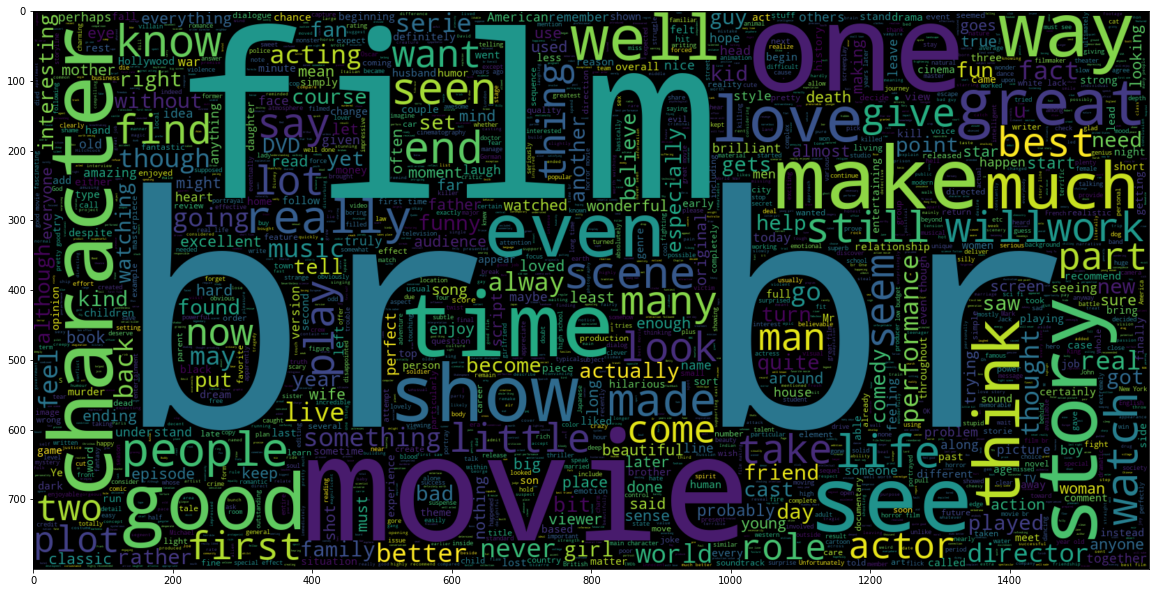

In [11]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data.review[data.sentiment == 'positive']))
plt.imshow(wc , interpolation = 'bilinear')

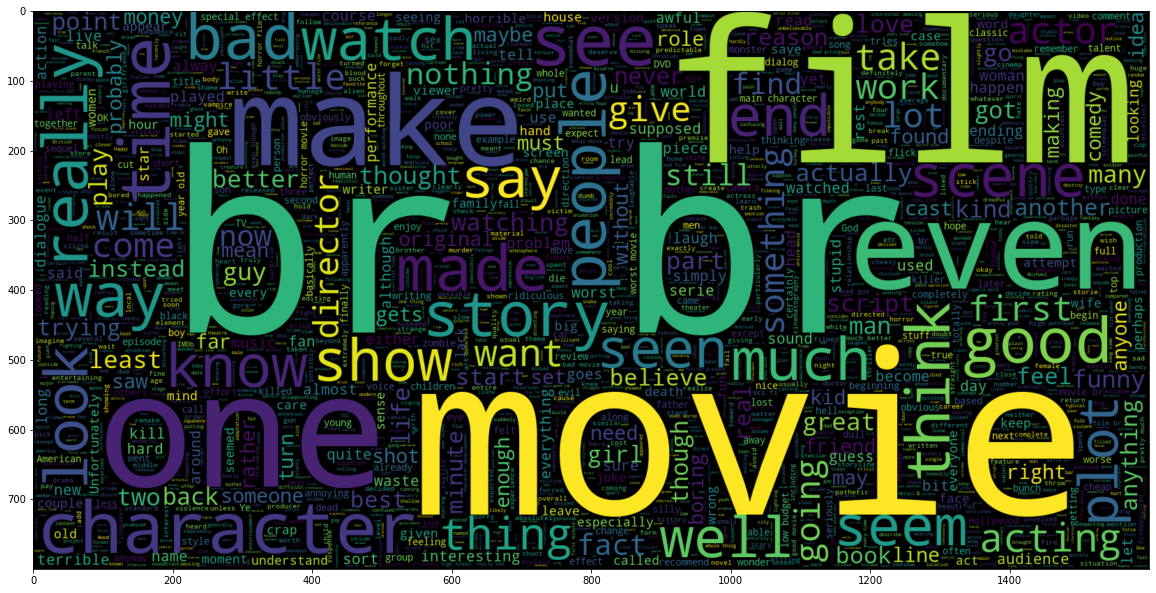

In [12]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data.review[data.sentiment == 'negative']))
plt.imshow(wc , interpolation = 'bilinear')

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 15000)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [14]:
len(X[0])

15000

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(f"Confusion_matrix :\n {cm},\n Accuracy_score: {ac}")

Confusion_matrix :
 [[4342  637]
 [ 816 4205]],
 Accuracy_score: 0.8547
